In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [167]:
human_presence = pd.read_csv(r"C:\Users\Nikita\Projects\vlm_for_iqa\data\human_presence_results_qwen.csv")
blurry_results = pd.read_csv(r"C:\Users\Nikita\Projects\vlm_for_iqa\data\blurry_results_qwen.csv")
niqe_results = pd.read_csv(r"C:\Users\Nikita\Projects\vlm_for_iqa\data\valid_niqe_results3000.csv")
other_taxa_results = pd.read_csv(r"C:\Users\Nikita\Projects\vlm_for_iqa\data\taxa_results_qwen_updated_prompt.csv")

In [168]:
blurry_results['file_path'] = blurry_results['Image Name']
blurry_results['Image Name'] = blurry_results['Image Name'].str.replace('D:\\iNaturalist\\test_3000\\', '', regex=False)
# Split by underscore and take the third element (index 2) for the ID
split_data = blurry_results['Image Name'].str.split('_', expand=True)

# Create flower_name column (first two parts)
blurry_results['flower_name'] = split_data[0] + '_' + split_data[1]

# Create id column (third part, after removing file extension)
blurry_results['id'] = split_data[2].str.split('.').str[0]

# Delete the 'Image Name' column in place
blurry_results.drop('Image Name', axis=1, inplace=True)


In [169]:
human_presence['Image Name'] = human_presence['Image Name'].str.replace('D:\\iNaturalist\\test_3000\\', '', regex=False)
# Split by underscore and take the third element (index 2) for the ID
split_data = human_presence['Image Name'].str.split('_', expand=True)

# Create flower_name column (first two parts)
human_presence['flower_name'] = split_data[0] + '_' + split_data[1]

# Create id column (third part, after removing file extension)
human_presence['id'] = split_data[2].str.split('.').str[0]

# Delete the 'Image Name' column in place
human_presence.drop('Image Name', axis=1, inplace=True)

In [170]:
niqe_results['Image_Path'] = niqe_results['Image_Path'].str.replace('D:\\iNaturalist\\test_3000\\', '', regex=False)
# Split by underscore and take the third element (index 2) for the ID
split_data = niqe_results['Image_Path'].str.split('_', expand=True)

# Create flower_name column (first two parts)
niqe_results['flower_name'] = split_data[0] + '_' + split_data[1]

# Create id column (third part, after removing file extension)
niqe_results['id'] = split_data[2].str.split('.').str[0]

# Delete the 'Image Name' column in place
niqe_results.drop('Image_Path', axis=1, inplace=True)

In [171]:

split_data = other_taxa_results['Image Name'].str.split('_', expand=True)

# Create flower_name column (first two parts)
other_taxa_results['flower_name'] = split_data[0] + '_' + split_data[1]

# Create id column (third part, after removing file extension)
other_taxa_results['id'] = split_data[2].str.split('.').str[0]

# Delete the 'Image Name' column in place
other_taxa_results.drop('Image Name', axis=1, inplace=True)
# Delete the Identification flower name
other_taxa_results.drop('Identified Flower Name', axis=1, inplace=True)

In [172]:
other_taxa_results.head()

,Contains Other Taxa,flower_name,id
0,No,Leucanthemum_vulgare,88373
1,No,Leucanthemum_vulgare,88388
2,No,Leucanthemum_vulgare,88396
3,No,Bellis_perennis,84593
4,No,Bellis_perennis,84613


In [173]:
dataframes_dict = {
    'dataset1': human_presence,
    'dataset2': blurry_results,
    'dataset3': niqe_results,
    'dataset4': other_taxa_results
}

In [174]:
# Start with the first DataFrame
merged_df = human_presence.copy()

# Merge each subsequent DataFrame on the common columns
merged_df = pd.merge(merged_df, blurry_results, on=['flower_name', 'id'], how='outer')
merged_df = pd.merge(merged_df, niqe_results, on=['flower_name', 'id'], how='outer')
merged_df = pd.merge(merged_df, other_taxa_results, on=['flower_name', 'id'], how='outer')

In [175]:
merged_df.head()

,Human Presence,flower_name,id,Blurry,file_path,NIQE_score,Contains Other Taxa
0,No,Bellis_perennis,10127,No,D:\iNaturalist\test_3000\Bellis_perennis_10127...,3.194589,Yes
1,No,Bellis_perennis,10150,No,D:\iNaturalist\test_3000\Bellis_perennis_10150...,2.865348,Yes
2,No,Bellis_perennis,10172,No,D:\iNaturalist\test_3000\Bellis_perennis_10172...,3.969215,Yes
3,No,Bellis_perennis,10250,No,D:\iNaturalist\test_3000\Bellis_perennis_10250...,2.802292,No
4,No,Bellis_perennis,1038,No,D:\iNaturalist\test_3000\Bellis_perennis_1038.jpg,4.511052,No


In [176]:
# Get all column names
all_columns = merged_df.columns.tolist()

# Remove flower_name and id from the list
remaining_columns = [col for col in all_columns if col not in ['flower_name', 'id']]

# Create new column order with flower_name and id first
new_column_order = ['flower_name', 'id'] + remaining_columns

# Reorder the DataFrame
merged_df = merged_df[new_column_order]


In [177]:
merged_df.describe()

,NIQE_score
count,3000.000000
mean,4.105560
std,0.947230
min,1.927771
25%,3.445136
50%,4.003557
75%,4.648312
max,11.836328


In [178]:
merged_df['flower_name'] = merged_df['flower_name'].str.replace('_', ' ', regex=False)

In [179]:
merged_df.head()

,flower_name,id,Human Presence,Blurry,file_path,NIQE_score,Contains Other Taxa
0,Bellis perennis,10127,No,No,D:\iNaturalist\test_3000\Bellis_perennis_10127...,3.194589,Yes
1,Bellis perennis,10150,No,No,D:\iNaturalist\test_3000\Bellis_perennis_10150...,2.865348,Yes
2,Bellis perennis,10172,No,No,D:\iNaturalist\test_3000\Bellis_perennis_10172...,3.969215,Yes
3,Bellis perennis,10250,No,No,D:\iNaturalist\test_3000\Bellis_perennis_10250...,2.802292,No
4,Bellis perennis,1038,No,No,D:\iNaturalist\test_3000\Bellis_perennis_1038.jpg,4.511052,No


In [180]:
# Save DataFrame to CSV file
merged_df.to_csv('C:\\Users\\Nikita\\Projects\\vlm_for_iqa\\complete_iqa.csv', index=False)

In [181]:
iqa = pd.read_csv(r"C:\Users\Nikita\Projects\vlm_for_iqa\data\complete_iqa.csv")


In [182]:
q = merged_df["NIQE_score"].quantile(0.99)
merged_df = merged_df[merged_df["NIQE_score"] < q]

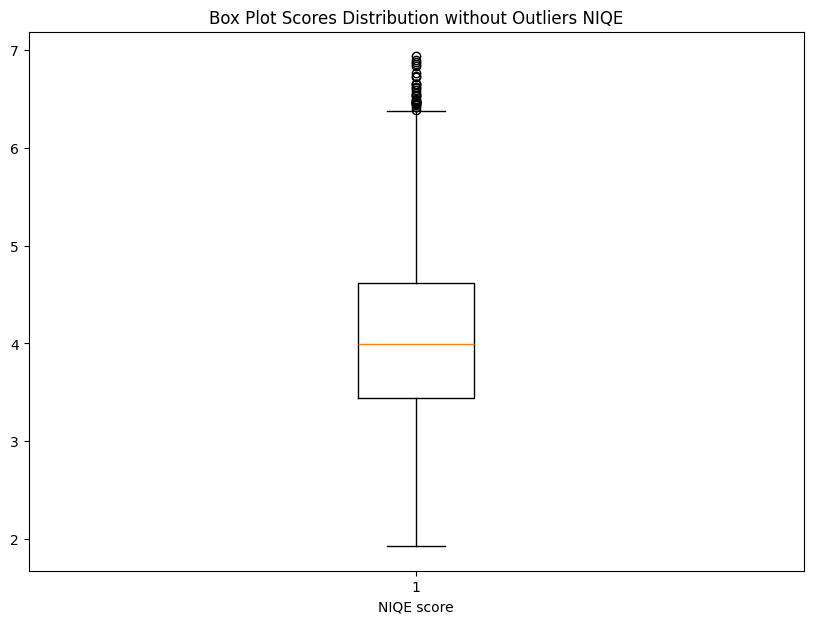

In [183]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(merged_df['NIQE_score'])
plt.xlabel('NIQE score')
plt.title('Box Plot Scores Distribution without Outliers NIQE')
plt.show()

In [184]:
Q1 = merged_df["NIQE_score"].quantile(0.25)
Q3 = merged_df["NIQE_score"].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
filtered_df = merged_df[merged_df['NIQE_score'] <= upper_whisker]

In [185]:
filtered_df.describe()

,NIQE_score
count,2939.000000
mean,4.041468
std,0.834542
min,1.927771
25%,3.431973
50%,3.978571
75%,4.589046
max,6.377324


In [186]:
# Filter the DataFrame using boolean conditions
filtered_df = filtered_df[(filtered_df['Human Presence'] == 'No') & (filtered_df['Blurry'] == 'No') & (filtered_df['Contains Other Taxa'] == 'No')]


In [187]:
filtered_df.describe()

,NIQE_score
count,2313.000000
mean,4.090619
std,0.830180
min,1.927771
25%,3.487659
50%,4.023888
75%,4.654311
max,6.377324


In [188]:
filtered_df.to_csv('C:\\Users\\Nikita\\Projects\\vlm_for_iqa\\filtered_iqa.csv', index=False)

In [189]:
ground_truth_original = merged_df[['flower_name', 'file_path']]
ground_truth_filtered = filtered_df[['flower_name', 'file_path']]

In [196]:
ground_truth_filtered.to_csv('C:\\Users\\Nikita\\Projects\\ZeroShot\\ground_truth_filtered.csv',index=False)
ground_truth_original.to_csv('C:\\Users\\Nikita\\Projects\\ZeroShot\\ground_truth_original.csv',index=False)

In [197]:
ground_truth_filtered.to_csv('C:\\Users\\Nikita\\Projects\\vlm_for_iqa\\data\\ground_truth_filtered.csv',index=False)
ground_truth_original.to_csv('C:\\Users\\Nikita\\Projects\\vlm_for_iqa\\data\\ground_truth_original.csv',index=False)